<a href="https://colab.research.google.com/github/blackboard-foundations/czechitas-workshop/blob/main/session2_section1_professor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<img src="https://raw.githubusercontent.com/blackboard-foundations/czechitas-workshop/main/anthology_logo.svg" alt="drawing" width="300"/>

This notebook is acompanying material to a workshop focused on neural networks that took place on the 23rd and 29th of November 2022. The workshop was organized by the data science team Morpheus from Anthology in cooperation with the organization Czechitas that focuses on education of women in IT. 

For more information see:
  * [Anthology web](https://www.anthology.com)
  * [Czechitas web](https://www.czechitas.cz)

We hope that you have enjoyed our workshop and that you will find this material useful.

# Chapter 2
## Behind the scenes – basics of how neural networks work

## Introduction

Before we dive in the concept of what an artificial neural network (ANN) is, let us first consider the meaning behind their name and its resemblance with the brain cells. The term is inspired on how neurons connect with each other in a biological sense: a given sending neuron can propagate an electrochemical signal to other receiving neuron (this is called a [synaptic transmission](https://en.wikipedia.org/wiki/Synapse)). This procedure transmits nervous impulses from one neuron to another, and allows them to communicate with each other. The procedure is depicted below:

<center><img src="https://drive.google.com/uc?id=1cvDDhC9s8IAep9jJKhPw3UwVtNXKysrJ" width="300" height="300">
<br>
<i>https://teachmephysiology.com/nervous-system/synapses/synaptic-transmission/</i>

Enough neurons connected together would lead to a neural circuit (also called a **biological neural network**). Each neuron in a biological network receives electrochemical inputs from other neurons. *If the sum of these electrical inputs is sufficiently powerful to activate the neuron*, it transmits an electrochemical signal along the network. A given biological neural network carry out an specific function on an organism when activated, and with this procedure the brain manages to perform from basic to extremely complex tasks.

<center><img src="https://imageio.forbes.com/specials-images/imageserve/5faa9171de31717024a2ccff/Brain--neural-network--illustration/960x0.jpg?format=jpg&width=960" width="450" height="300">
<br>
<i>https://www.forbes.com/sites/forbestechcouncil/2020/11/11/how-the-future-of-deep-learning-could-resemble-the-human-brain/?sh=3939c7cb415c</i>



An ANN resembles this behaviour in a beautiful manner: it propagates information from one *artificial neuron* to another when enough signal activates it. The interconectivity from the biological neural networks also translates into ANN, allowing them to tackle extremely complicated problems in data science, such as image and video classification, speech and text modeling. But, what is exactly an artificial neuron? and, how do they connect with each other in order to form an ANN? First we will dive into the definition of a perceptron, which will formalize a simple human thought process.

## Peceptron

Undertanding what a perceptron is would be the first step towards the understanding of an ANN: this is the smplest form of an ANN. A *perceptron* is a rule $f$ which takes an input and throws an output. There can be one or multiple inputs but only a single output, the output must be binary: either 1 (TRUE) or 0 (FALSE). The inputs can be binary or not (although [some](http://neuralnetworksanddeeplearning.com/chap1.html) suggest perceptrons only take binary inputs, it does not make any difference in the current explanation). It might seem abstract, but you can think on a perceptron as a **decision making process**, where inputs correspond to bits of information that support a given yes/no decision.

$$ f(\text{Input }1,...,\text{Input }n) = \text{Output Decision} $$

Let us think that a student wants to decide whether to go home after classes or stay and have a beer with friends (that would be the binary outcome: 1 if the student goes home and 0 if stays). Naturally, this decision depends on some relevant prior information (these would be the binary inputs):

- **Input 1** Does the student have to work tomorrow?
- **Input 2** Was there some assignment in the class?
- **Input 3** Can the student catch the train back home afterwards?

We can represent these caracteristics as binary atributes:

$$
x_1 =
\begin{cases}
 1  ,& \text{Have to work tomorrow} \\
 0  ,& \text{Don't have to work tomorrow}
 \end{cases}  
 x_2 =
\begin{cases}
 1  ,& \text{Have assignment} \\
 0  ,& \text{Don't have assignment}
 \end{cases}
 x_3 =
\begin{cases}
 1  ,& \text{Can't catch the train} \\
 0  ,& \text{Can catch the train}
 \end{cases}       
$$

Not all inputs are equally important for taking the decision:
- If the student has an assignment but next class is three days from today, it might not be that relevant to have the assignment for making the decision (and probably the student would still go for that beer).
- If the student can't catch the train back home, the student might have to take a cab, which can be quite expensive, or even worse, the student might not even get back home until next day!
- If the student has to work next day, he/she would probably want to be fresh next morning, so the student might think twice before having a beer with friends.

Of course the student weights those different factors before making a decision, let us quantify that: the larger the weight, the more would affect on the final decision. For example, we can set $w_1=3$, $w_2 = 2$ and $w_3 = 6$. Note that the overall 'cost' $C$ of the decision would be 

$$C =\sum_{i} x_i w_i= x_1 w_1 + x_2 w_2 +x_3 w_3$$

- If the student has to work tomorrow, but no assignment and can catch the train. $C=3$.
- If the student has assignment, but no work tomorrow and can catch the train. $C=2$.
- If the student can't catch the train, but no work tomorrow and no assignment. $C=6$.
- If the student has assignment and work tomorrow but can catch the train. $C=5$.

It is interesting to see that it is more costly not to catch the train than having both assignment and work next day.

As described above, the student would still go for a beer with friends even if an assignment has been placed. So the student has some 'tolerance' for making the decision: if the overall cost is above $t=4$, it would be too costly, so the student would reject the invitation of beer with friends. We have just added a threshold $t$ for the cost value in decision making:

$$
\text{Output Decision} =
\begin{cases}
 1  ,& \sum_{i} x_i w_i > t  \\
 0  ,& \sum_{i} x_i w_i \leq  t
 \end{cases} =
 \begin{cases}
 1  ,& -t + \sum_{i} x_i w_i > 0  \\
 0  ,& -t + \sum_{i} x_i w_i \leq  0
 \end{cases}
$$


If we let $b=-t$ and the **activation function** $\sigma(x)$ to be the step function at 0, that is:

$$
\sigma(x) =
\begin{cases}
 1  ,& x > 0 \\
 0  ,& x \leq  0
 \end{cases} 
$$

The output decision can be written as $\sigma(b + \sum_{i} x_i w_i)$. We can summarize graphically $f$ as follows:

<center><img src="https://drive.google.com/uc?id=1JF3iampN5qt3q6Rz6gt7NRy61jyxv2aS" width="600" height="200">
<br>

With a perceptron we can mimic a given simple human thought process:
the synaptic transmission only happens when the total signal received at the neuron exceeds certain level; likewise we need enough evidence (weighted sum of inputs above threshold $t$) to turn the perceptron on. With this, we can formalize the notion of what an artificial neuron is and to program it with a computer.

Before we go any further, make sure to first install the following packages:

In [ ]:
!pip install ipympl
!pip install mpl_interactions

Next **restart the runtime** (Up in the toolbar: Runtime/Restart Runtime, and finally, load the following packages:

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()
%matplotlib widget
import numpy as np
import mpl_interactions.ipyplot as iplt
import matplotlib.pyplot as plt

### Exercise 2.1

Write down a function that evaluates the perceptron $f$ described above (the parameters for this function would be the threshold, inputs and weights. The output would be the decision). Using your perceptron, would the student go home instead of going for a beer with friends if the student has both assignment and work next day but can catch the train? (consider $t=4$)

In [ ]:
def activation_f(value):
    return value>0

def perceptron_f(threshold,weight1,weight2,weight3,input):
    bias        = - threshold
    linear_comb = input[0]*weight1 + input[1]*weight2 + input[2]*weight3 + bias
    return activation_f(linear_comb)

# The student would go home with this set of parameters
perceptron_f(threshold=4,weight1=3,weight2=2,weight3=6,input=[1,1,0])

True

### Exercise 2.2

Use a perceptron with the parameters defined in exercise 2.1 but changing the threshold parameter from 1 to 10 and the output to be the linear combination instead of the actual activation. How does the student's decision change? 

In [ ]:
def perceptron_v(threshold,weight1,weight2,weight3,input):
    bias        = - threshold
    linear_comb = input[0]*weight1 + input[1]*weight2 + input[2]*weight3 + bias
    return linear_comb
# As we increase the threshold, the 'tolerance' to go for a beer with friends gets smaller
[perceptron_f(threshold=i+1,weight1=3,weight2=2,weight3=6,input=[1,1,0]) for i in range(10)]

[True, True, True, True, False, False, False, False, False, False]

In [ ]:
# As we increase the threshold, the 'tolerance' to go for a beer with friends gets smaller
[perceptron_v(threshold=i+1,weight1=3,weight2=2,weight3=6,input=[1,1,0]) for i in range(10)]

[4, 3, 2, 1, 0, -1, -2, -3, -4, -5]

### Exercise 2.3

Use a perceptron with the parameters defined in exercise 2.1 but changing the weight parameter for working next day from 1 to 3. How does the student's decision change? 

In [ ]:
# As we decrease the importance for working next day, we may end up going to a beer with friends
[perceptron_f(threshold=4,weight1=i,weight2=2,weight3=6,input=[1,1,0]) for i in range(1,4)]

[False, False, True]

In [ ]:
# As we decrease the importance for working next day, we may end up going to a beer with friends
[perceptron_v(threshold=4,weight1=i,weight2=2,weight3=6,input=[1,1,0]) for i in range(1,4)]

[-1, 0, 1]

### Linear separation

As we saw previously, not only the input on the perceptron affects its output, its parameters (bias and weights) can also change the output. We will se how this characteristics define **decision boundaries** in the feature space. For this, let us consider a simple example in which our perceptron $f$ only has two input variables ($x_1$ and $x_2$). In this case, the output decision is given by $\sigma(b + \sum_{i} x_i w_i) = \sigma(b + x_1 w_1 + x_2 w_2)$. This implies that the weighted sum of inputs $x_1 w_1 + x_2 w_2$ can be represented as a straight line and the perceptron divides the feature space in two regions:

* **Region 1 (R1)** $b + x_1 w_1 + x_2 w_2 >0 \equiv x_1 w_1 + x_2 w_2 >t$
* **Region 2 (R2)** $b + x_1 w_1 + x_2 w_2 \leq 0 \equiv x_1 w_1 + x_2 w_2 \leq t$

So that if a given point $(x_1,x_2)$ falls in R1, the peceptron will be active. If it falls in R2, it will be unactive.

Such regions, since they are separated by a single line, are called **linearly separable regions**. In this simple scenario, the dividing line is given by:

$$b + x_1 w_1 + x_2 w_2 = 0 $$

This is equivalent to:

$$x_2 = -\frac{w_1}{w_2} \cdot x_1 - \frac{1}{w_2} \cdot b$$

For the equation of a straight line (with a slope and an intercept) given by $y=mx+c$, this leads to

$$m = -\frac{w_1}{w_2} \hspace{0.5cm} \text{and} \hspace{0.5cm} c=- \frac{1}{w_2} \cdot b$$

We can plot this lines for multiple parameters and define their corresponding separable regions.

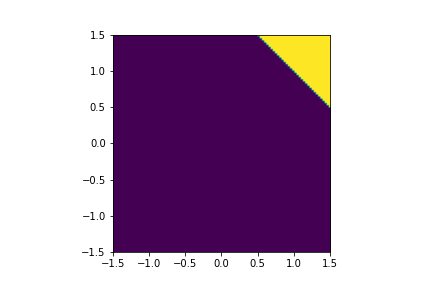

In [ ]:
def linear_region(x1,x2,weight1,weight2,bias):
    linear_comb = x1*weight1 + x2*weight2 + bias
    return linear_comb>0

x1     = np.linspace(-1.5, 1.5,101) ; x2     = np.linspace(-1.5, 1.5,101)
X1,X2  = np.meshgrid(x1,x2)
wt1    = np.linspace(1, 5, 5)   ; wt2    = np.linspace(1, 5, 5)
bias   = np.linspace(-2, 2, 11)

fig, ax = plt.subplots()
controls = iplt.imshow(lambda w1,w2,b: linear_region(X1,X2,w1,w2,b), w1=wt1, w2=wt2, b=bias,origin='lower',extent=[-1.5,1.5,-1.5,1.5])
plt.show()

### Exercise 2.4

Given the plot above, how do the decision boundaries change with changes on each of the parameters?

In [ ]:
# As a given weight increases(decreases), the corresponding variable becomes more (less) important for activating the perceptron.
# As the bias increases (decreases), the threshold or 'tolerance' decreases (increases), so the perceptron activates with less signal.

Given the previous analysis:

* Depending on the perceptron's parameters we have a different decision boundary, and this allows flexibility in our decision process.
* This boundary implicitly **classifies** each point from the input space: mapping a point ($x_1$,$x_2$) as either a 0 or 1 value.

With this, we can think on finding a set of parameters that lead to a desired separation of input points, so we understand the weights and biases that generate the desired separation. Let us see an example where we have 4 points, each with either class $+$ or class $\times$:

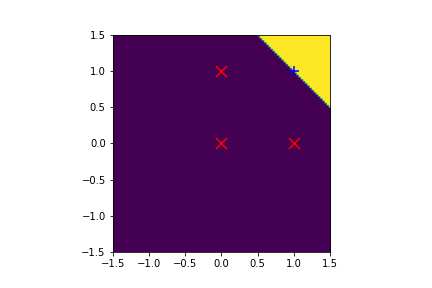

In [ ]:
fig, ax = plt.subplots()
ax.scatter([0,0,1],[0,1,0],marker='x',s=120,color='red')
ax.scatter([1],[1],marker='+',s=120,color='blue')

controls = iplt.imshow(lambda w1,w2,b: linear_region(X1,X2,w1,w2,b), w1=wt1, w2=wt2, b=bias,
                       origin='lower',extent=[-1.5,1.5,-1.5,1.5])
plt.show()

Using an appropriate weight vector an bias (try for example $w_1 =1 $, $w_2 =1 $, $b=-1.2$), a perceptron can distinguish the class for the 4 data points, giving an accuracy of 4/4 points correctly classified. As we can accurately separate the data with a perceptron, it is said that the dataset is a **linearly separable dataset**. Note that the input data and the classes above follow the logic function AND:

<center><table>
  <tr>
    <th>Value for x1</th>
    <th>Value for x2</th>
    <th>Class = AND(x1,x2)</th>
  </tr>

  <tr>
    <td>1</td>
    <td>1</td>
    <td>1</td>
  </tr>

  <tr>
    <td>1</td>
    <td>0</td>
    <td>0</td>
  </tr>

  <tr>
    <td>0</td>
    <td>1</td>
    <td>0</td>
  </tr>

  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>

</table>

### Exercise 2.5

Following the example described above, the dataset for the logic operators OR and NAND are displayed below (NOT-AND):

<center><table>
  <tr>
    <th>Value for x1</th>
    <th>Value for x2</th>
    <th>Class = OR(x1,x2)</th>
    <th>Class = NAND(x1,x2)</th>
  </tr>

  <tr>
    <td>1</td>
    <td>1</td>
    <td>1</td>
    <td>0</td>
  </tr>

  <tr>
    <td>1</td>
    <td>0</td>
    <td>1</td>
    <td>1</td>
  </tr>

  <tr>
    <td>0</td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
  </tr>

  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
  </tr>

</table>

Find a set of parameters that distinguish the two classes for the OR operator:

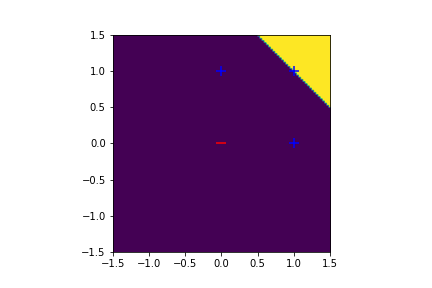

In [ ]:
fig, ax = plt.subplots()
ax.scatter([1,0,1],[1,1,0],marker='+',s=120,color='blue')
ax.scatter([0],[0],marker='_',s=120,color='red')

controls = iplt.imshow(lambda w1,w2,b: linear_region(X1,X2,w1,w2,b), w1=wt1, w2=wt2, b=bias,origin='lower',extent=[-1.5,1.5,-1.5,1.5])
plt.show()

And the NAND operator:

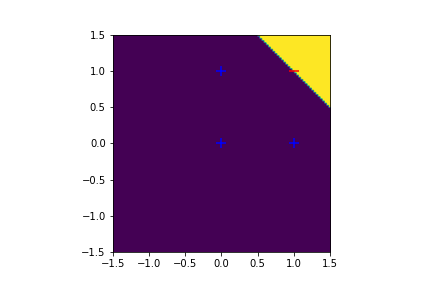

In [ ]:
fig, ax = plt.subplots()
ax.scatter([0,0,1],[0,1,0],marker='+',s=120,color='blue')
ax.scatter([1],[1],marker='_',s=120,color='red')

controls = iplt.imshow(lambda w1,w2,b: linear_region(X1,X2,w1,w2,b), w1=wt1, w2=wt2, b=bias,origin='lower',extent=[-1.5,1.5,-1.5,1.5])
plt.show()

### Exercise 2.6

Following the example described above, the dataset for the logic operator XOR given by:

<center><table>
  <tr>
    <th>Value for x1</th>
    <th>Value for x2</th>
    <th>Class = XOR(x1,x2)</th>
  </tr>

  <tr>
    <td>1</td>
    <td>1</td>
    <td>1</td>
  </tr>

  <tr>
    <td>1</td>
    <td>0</td>
    <td>0</td>
  </tr>

  <tr>
    <td>0</td>
    <td>1</td>
    <td>0</td>
  </tr>

  <tr>
    <td>0</td>
    <td>0</td>
    <td>1</td>
  </tr>

</table>

Find a set of parameters that distinguish the two classes for the XOR operator:

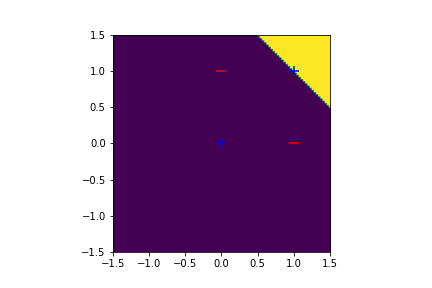

In [ ]:
fig, ax = plt.subplots()
ax.scatter([1,0],[1,0],marker='+',s=120,color='blue')
ax.scatter([1,0],[0,1],marker='_',s=120,color='red')

controls = iplt.imshow(lambda w1,w2,b: linear_region(X1,X2,w1,w2,b), w1=wt1, w2=wt2, b=bias,origin='lower',extent=[-1.5,1.5,-1.5,1.5])
plt.show()

## Multilayer perceptron

As we learnt from the introduction, a biological neural network is composed by a set of interconnected neurons and this allows us as humans to perform difficult tasks. The same works for more complicated decisions on a perceptron: we can archieve higher complexity (for example, nonlinear separability) if multiple perceptrons are simultaneously considered by chaining them together, this is called a **multilayer perceptron**. For gaining undertanding on the importance of this topic, let us revisit the XOR operator:

### XOR Problem

As you probably saw on exercise 2.6, not all logic operators are linearly separable: No matter which straight line you choose, you will never succeed in having 0 on one side and the 1 on the other side for the XOR operator. Yet this problem could be overcome by using more than one perceptron:

<center><img src="https://drive.google.com/uc?id=1d_KpnkuDlGI5YS7PfVCv85-6ZYzBuZya" width="750" height="200">
<br>

It might look complex, but **it has the same spirit that the single perceptron had**: It is a function $f$ which takes an input and throws an output and that depends on a set of parameters (weights and biases). Here we have three times more parameters than before, because we have 3 perceptrons instead of only one. Another important aspects are highligted:

- There is a layer structure in the architecture for the multilayer perceptron, two of them contain the same key features we previously had on a single perceptron:
  - Input layer: Contains the information from the feature space ($x_1$,$x_2$).
  - Output layer: Outputs the final decision given by the function $f$ ($y$).
- An additional *hidden layer* is created. This can be thought as a feature engineering step, in which we generate features as linear combinations from the input data ($x'_1$,$x'_2$).

### Exercise 2.7

A function that evaluates the multilayer perceptron $f$ described is below (note that the parameters for this function would be the biases, inputs and weights. The output would be the decision). Find a set of parameters that distinguish the two classes for the XOR operator:

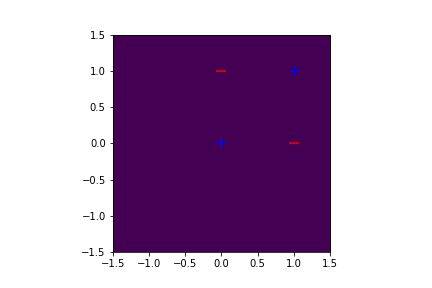

In [ ]:
def activation_f(value):
    return value>0

def linear_region2(x1,x2,
                   weight11,weight12,bias1,
                   weight21,weight22,bias2,
                   weight31,weight32,bias3):
    perc_1 = activation_f(x1*weight11 + x2*weight12 + bias1)
    perc_2 = activation_f(x1*weight21 + x2*weight22 + bias2)
    perc_3 = activation_f(perc_1*weight31 + perc_2*weight32 + bias3)
    return perc_3

x1     = np.linspace(-1.5, 1.5,101) ; x2     = np.linspace(-1.5, 1.5,101)
X1,X2  = np.meshgrid(x1,x2)
wt11   = np.linspace(-5, 5, 11)  ; wt12    = np.linspace(-5, 5, 11) ; bias1  = np.linspace(-3, 3, 7)
wt21   = np.linspace(-5, 5, 11)  ; wt22    = np.linspace(-5, 5, 11) ; bias2  = np.linspace(-3, 3, 7)
wt31   = np.linspace(-5, 5, 11)  ; wt32    = np.linspace(-5, 5, 11) ; bias3  = np.linspace(-3, 3, 7)

fig, ax = plt.subplots()
ax.scatter([1,0],[1,0],marker='+',s=120,color='blue')
ax.scatter([1,0],[0,1],marker='_',s=120,color='red')
controls = iplt.imshow(lambda w11,w12,b1,w21,w22,b2,w31,w32,b3: linear_region2(X1,X2,w11,w12,b1,w21,w22,b2,w31,w32,b3),
                       w11=wt11,w12=wt12,b1=bias1,
                       w21=wt21,w22=wt22,b2=bias2,
                       w31=wt31,w32=wt32,b3=bias3,
                       origin='lower',extent=[-1.5,1.5,-1.5,1.5])
plt.show()

### Activation functions and neural networks

So far for both the single layer and multilayer perceptron we have used the following activation function.
$$
\sigma(x) =
\begin{cases}
 1  ,& x > 0 \\
 0  ,& x \leq  0
 \end{cases} 
$$

This function is either 'on' or 'off' depending on the signal given by $x$, and presents at least a couple of challenges: 

* The perceptron can drastically change with small changes on weights and biases(go back to the animation above and make sure you see that an abrupt change in the region might happen with small parameter changes). This may not be good when finding the best parameters for a given dataset (such as in the XOR problem). 
* Perceptrons (having a linear activation function) only allow for linearity in the decision boundaries.

Go back to the XOR exercise above and see how the activation function is just an additional parameter for the multilayer perceptron: we could use any other function to 'trigger' the perceptron given the signal $x$. If we use the **sigmoid activation function** instead, you will have a **sigmoid neuron**, which is given by:

$$
\sigma(x) =
\frac{1}{1+\exp(-x)}
$$

And plotted below together with the step activation function:

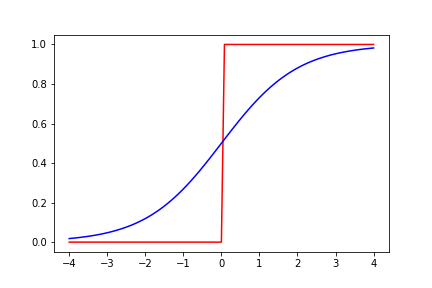

In [ ]:
fig, ax = plt.subplots()
t = np.linspace(-4, 4,101)
activation_1 = lambda x : x > 0
activation_2 = lambda x : 1/(1+np.exp(-x))

plt.plot(t, [activation_1(val) for val in t], 'r')
plt.plot(t, [activation_2(val) for val in t], 'b')
plt.show()

With this we get a continous activation in the $[0,1]$ interval instead of a dichotomous one. Let us see how this changes the XOR boundaries:

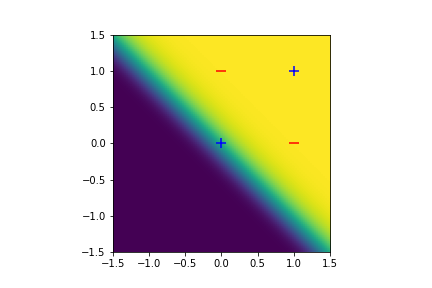

In [ ]:
def nlinear_region(x1,x2,
                   weight11,weight12,bias1,
                   weight21,weight22,bias2,
                   weight31,weight32,bias3):
    perc_1 = activation_2(x1*weight11 + x2*weight12 + bias1)
    perc_2 = activation_2(x1*weight21 + x2*weight22 + bias2)
    perc_3 = activation_2(perc_1*weight31 + perc_2*weight32 + bias3)
    return perc_3

x1     = np.linspace(-1.5, 1.5,101) ; x2     = np.linspace(-1.5, 1.5,101)
X1,X2  = np.meshgrid(x1,x2)
wt11   = np.linspace(-5, 5, 11)  ; wt12    = np.linspace(-5, 5, 11) ; bias1  = np.linspace(-3, 3, 7)
wt21   = np.linspace(-5, 5, 11)  ; wt22    = np.linspace(-5, 5, 11) ; bias2  = np.linspace(-3, 3, 7)
wt31   = np.linspace(-5, 5, 11)  ; wt32    = np.linspace(-5, 5, 11) ; bias3  = np.linspace(-3, 3, 7)

fig, ax = plt.subplots()
ax.scatter([1,0],[1,0],marker='+',s=120,color='blue')
ax.scatter([1,0],[0,1],marker='_',s=120,color='red')
controls = iplt.imshow(lambda w11,w12,b1,w21,w22,b2,w31,w32,b3: nlinear_region(X1,X2,w11,w12,b1,w21,w22,b2,w31,w32,b3),
                       w11=wt11,w12=wt12,b1=bias1,
                       w21=wt21,w22=wt22,b2=bias2,
                       w31=wt31,w32=wt32,b3=bias3,
                       origin='lower',extent=[-1.5,1.5,-1.5,1.5])
plt.show()

In general, when you have either multilayer perceptron or a multilayer sigmoid (or any other activation function), the mathematical architecture of the underlying function is called **artificial neural network** (ANN), and each of the single activations are called **neurons**.

### Math behind ANN: vectors and matrices

The math behind ANN implies a significant growth in the number of parameters: In the multilayer perceptron example we went from 3 parameters to 9 to solve the XOR problem. It is helpful to keek things organized in a meanminful way for understanding more complex neural models. We will use the previous multilayer perceptron as example to write down the math behind a general ANN:

* $w^{l}_{jk}$ = Weight for the connection from the $k$-th neuron (in the $l-1$ layer) to the $j$-th neuron (in the $l$-th layer).
* $b^{l}_j$ = bias of the $j$-th neuron in the $l$-th layer.
* $a^{l}_j$ = activation of the $j$-th neuron in the $l$-th layer.

We can refresh the notation for the neural network used on the XOR problem:

<center><img src="https://drive.google.com/uc?id=10USa6zWOrB4oVUsgj1Mr5POHdO_-HvFJ" width="750" height="200">
<br>

We can write as a vector multiplication the sum inside the activation. We will stick to the hidden layer on the XOR 2 dimensional case (activations $a^1_{1}$ and $a^1_{2}$), but this can be generalized to any number of dimensions. For the first activation on the hidden layer: 

$$
\begin{align}
   \sum_{i} a^0_{i} w^1_{1i} &= a^0_{1} w^1_{11} +a^0_{2} w^1_{12}  = [a^0_{1},a^0_{2}]\begin{bmatrix}
           w^1_{11} \\
           w^1_{12}
         \end{bmatrix} = \mathbf{a}^0 \mathbf{w}_1^{1}
  \end{align}
$$

Where $\mathbf{a}^0$ concatenates $a^0_{1}$ and $,a^0_{2}$ as a **vector** the activations on layer 0 and $\mathbf{w}_1^1$ does the same for the weights $ w^1_{11}$ and $ w^1_{12}$ from the first activation on layer 1. The same can be done for the sumation on the second activation $a^1_{2}$, obtaining:

$$\mathbf{a}^0 \mathbf{w}_1^{1} \text{  and  } \mathbf{a}^0 \mathbf{w}_2^{1}$$

If we set the matrix $W^{1}$ as the weight matrix of the first layer, it would be composed by $w_1^{1}$ and $w_2^{1}$:

$$\mathbf{W}^{1} = 
[
\mathbf{w}_1^{1},
\mathbf{w}_2^{1}
]
=
\begin{bmatrix}
w_{11}^{1} & w_{21}^{1} \\
w_{12}^{1} & w_{22}^{1}
\end{bmatrix}$$

This sets the weights from the first layer on a matricial form. Using matrix multiplication, both summations can be summarized as follows

$$ \mathbf{a}^0\mathbf{W}^{1} = [a^0_{1},a^0_{2}] \begin{bmatrix}
w_{11}^{1} & w_{21}^{1} \\
w_{12}^{1} & w_{22}^{1} 
\end{bmatrix}
=
[
a^0_{1} w^1_{11} +a^0_{2} w^1_{12},
a^0_{1} w^1_{21} +a^0_{2} w^1_{22} ]
$$

We can define the vector $\mathbf{b}^{1}=[b_1^{1},b_2^{1}]$ as the vector of biases for the first layer. With this vector and the previous matrices, we can simplify the notation on the vector of activations for the hidden layer as follows:

$$\mathbf{a}^1 = \sigma(\mathbf{a}^0 \mathbf{W}^{1} + \mathbf{b}^{1}) = \sigma([
a^0_{1} w^1_{11} +a^0_{2} w^1_{12} + b_1^{1},
a^0_{1} w^1_{21} +a^0_{2} w^1_{22} + b_2^{1}])$$

Note that the activation function $\sigma()$ would be operated over a vector instead of a scalar. On this case the activation function would be used on each entry of the vector

$$\mathbf{a}^1 = [a^1_{1},a^1_{2}] = ([
\sigma(a^0_{1} w^1_{11} +a^0_{2} w^1_{12} + b_1^{1}),
\sigma(a^0_{1} w^1_{21} +a^0_{2} w^1_{22} + b_2^{1})])$$

## Conclusions

* An ANN resembles the BNN behaviour: it propagates information from one artificial neuron to another when enough signal activates it.
* A (single/multiple) perceptron can be thought as a decision making process, where inputs correspond to binary information that support a given yes/no decision. The decision can be either simple (AND operator) or rather complex (XOR operator).
* Decision boundaries in the feature space are defined by a given set of parameters from an ANN. This implicitly scores each point from the input space (in {0,1} with a perceptron or [0,1] with a sigmoid neuron).
* Multiple activation functions could be used to "fire" a neuron, this changes several aspects on a given ANN (decision boundaries being one of those aspects). Two instances of activation functions are the stepwise function and the sigmoid function.

## References

* Nielsen, M. A. (2015). Neural networks and deep learning (Vol. 25). San Francisco, CA, USA: Determination press.
* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112, p. 18). New York: springer.
* But what is a neural network? | Chapter 1, Deep learning. Available at:
  https://www.youtube.com/watch?v=aircAruvnKk&t=105s